In [259]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [260]:
df = pd.read_csv('ashy.csv')

In [261]:
df.head()

,Date,Lab Test,Lab Results,Evaluation,Lab Range,Location
0,05-09-15,Platelet Count (PLT),220.000 10^3/µl,Normal,200.000 - 500.000 10^3/µl,Cambridge
1,05-09-15,Nucleated RBC,0.000,Negative,NaN,Cambridge
2,05-09-15,Rouleau Formation - RBC,0.000,Negative,NaN,Cambridge
3,05-09-15,RBC Morphology,0.000,Normal,NaN,Cambridge
4,05-09-15,Platelet Count (PLT),220.000 10^3/µl,Normal,200.000 - 500.000 10^3/µl,Cambridge


In [262]:
df.dtypes

Date           object
Lab Test       object
Lab Results    object
Evaluation     object
Lab Range      object
Location       object
dtype: object

In [263]:
ex_range_tests = ['BUN', 'Phosphorus (PHOS)', 'Creatinine (CREA)', 'Cholesterol (CHOL)', 'Calcium (CA)', 'Hematocrit (HCT)', 'MCV']

In [264]:
ex_range_df = df.loc[df['Lab Test'].isin(ex_range_tests)]

In [265]:
ex_range_df.loc[:,'Range Max'] = ex_range_df.loc[:,'Lab Range']

In [266]:
ex_range_df = ex_range_df.replace(to_replace={ 'Range Max' : {"\d*.\d*\s-\s" : ''} }, regex=True)

In [267]:
ex_range_df = ex_range_df.replace(to_replace={ 'Lab Results' : {"\s.*" : ''}, 'Range Max' : {"\s.*" : ''} }, regex=True)

In [268]:
ex_range_df['Lab Results'] = ex_range_df['Lab Results'].astype('float')

Questions: hyperthyroidism? anaemia? high cholesterol

In [269]:
ex_range_df['Date'] = pd.to_datetime(ex_range_df['Date'])

In [270]:
ex_range_df = ex_range_df.sort('Date')

In [271]:
ex_range_df.head()

,Date,Lab Test,Lab Results,Evaluation,Lab Range,Location,Range Max
572,2009-11-07,BUN,28.00,Normal,16.000 - 36.000 mg/dL,Cambridge,36.000
560,2009-11-07,MCV,49.00,Normal,39.000 - 50.000 fl,Cambridge,50.000
536,2010-05-04,Hematocrit (HCT),44.76,Normal,25.000 - 45.000 %,Cambridge,45.000
527,2010-05-04,BUN,27.00,Normal,16.000 - 36.000 mg/dL,Cambridge,36.000
540,2010-05-04,MCV,51.00,Above Normal,39.000 - 50.000 fl,Cambridge,50.000


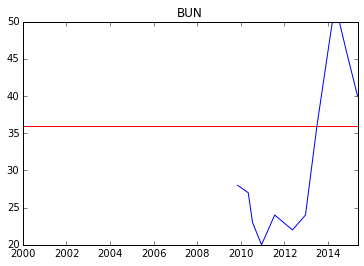

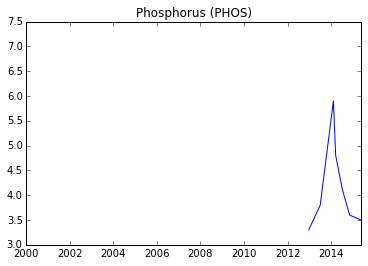

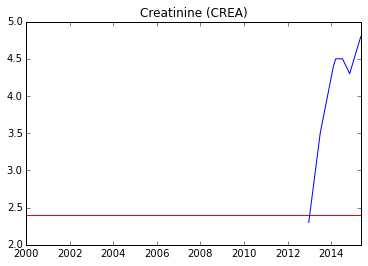

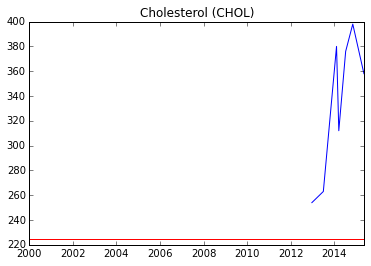

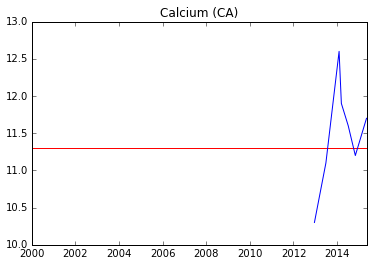

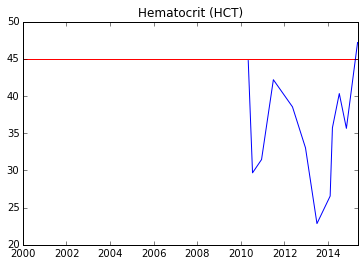

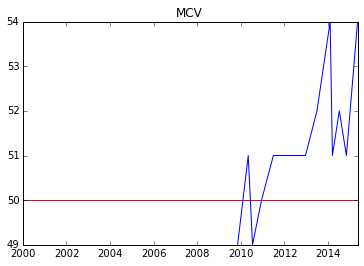

In [272]:
for test in ex_range_tests:
    test_df = ex_range_df[ex_range_df['Lab Test'] == test][['Date', 'Lab Results', 'Range Max']]
    plt.axhline(y=max(test_df['Range Max']), color='r')
    plt.plot(test_df['Date'], test_df['Lab Results'])
    plt.title(test)
    plt.show()